# Packages

In [1]:
#mport Pkg;
#Pkg.add("DifferentialEquations")
#Pkg.add("Plots")
#Pkg.add("NLsolve")
#Pkg.add("ForwardDiff")
#Pkg.add("LinearAlgebra")
#Pkg.add("Interact")
#Pkg.add("JuMP")
#Pkg.add("Ipopt")
#Pkg.add("OptimalControl")
#Pkg.add("Roots")
# Packages
using DifferentialEquations
using Plots
using NLsolve
using ForwardDiff
using LinearAlgebra
using Roots
include("utils.jl") # plot_traj!, plot_flow!, Flow
include("Fonctions.jl");


# Parametres et variables

In [6]:
temps = []
masse = []
adjoint = []

# Conditions initiales et intervalle de temps
t0 = 0.0
tf = 40.0
pf = 0.0  # État initial pour p
tspan = (tf, t0)
final_masses = range(0.1, stop=20.0, length=75)  # Plage de valeurs pour mf

0.1:0.2689189189189189:20.0

# Methode directe 

In [3]:

using OptimalControl

t0 = 0      # initial time
tf = 40.0
# Dynamics
const b = 1
const e = 1
const a = 1

F1(x) = begin
    return  (b/(e+x))
end

F2(x) = begin
    return  ((a*x)/(e+x)) 
end;
G(x) = begin 
    return (1/(e+x))
end;

Problem(x0) = begin 

    @def ocp begin # definition of the optimal control problem

        t ∈ [ t0, tf ], time
        x ∈ R, state
        u ∈ R, control

        x(t0) == x0

        -x(t) ≤ 0.0
        -1.0 ≤ u(t) ≤ 1.0

        ẋ(t) == (1+u(t))/2 * F1(x(t)) - (1 - u(t))/2 * F2(x(t))
        
        ∫(u(t)*G(x(t)))  → max

    end;
    return  OptimalControl.solve(ocp, grid_size=1500)

end


Problem (generic function with 1 method)

# Creation de plots: Methode Directe

In [4]:
times = t0:0.1:tf
plt_direct = plot()
plt_traj_directe!(plt_direct, times,Problem);
plt_adj = plot()
plt_traj_rev!(plt_direct, plt_adj, final_masses)

Method = (:direct, :adnlp, :ipopt)
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    15002
Number of nonzeros in inequality constraint Jacobian.:     1501
Number of nonzeros in Lagrangian Hessian.............:     3002

Total number of variables............................:     4503
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     1501
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3002
Total number of inequality constraints...............:     1501
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1501

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 2.90e-01   0.

# Affichage de la figure finale : Methode directe et methode retrograde

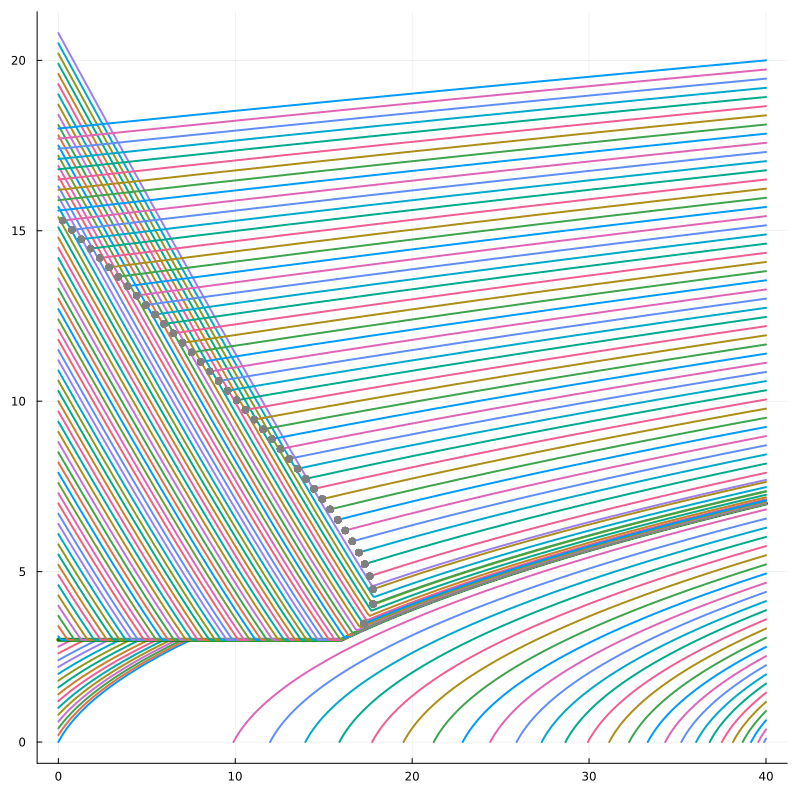

In [5]:

# Afficher le graphique final
display(plt_direct)